# Box Filter

In [17]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte, transform
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

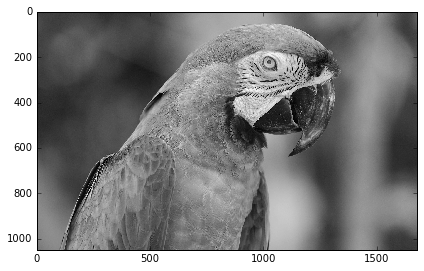

In [43]:
i1 = imread('parrot.png', as_grey = True)
plt.figure
imshow(i1)

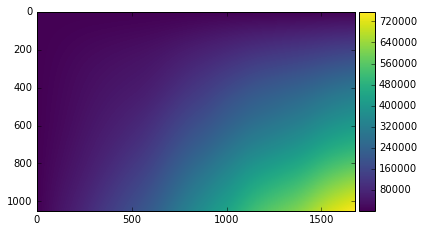

In [44]:
int_i1 = transform.integral_image(i1)
plt.figure
imshow(int_i1)

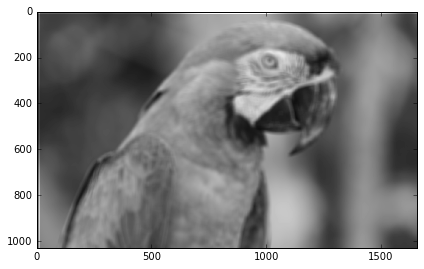

In [47]:
aper = 20
i1_2 = np.ones((i1.shape[0] - aper, i1.shape[1] - aper))
for i in range(aper / 2, i1.shape[0] - aper / 2):
    for j in range(aper / 2, i1.shape[1] - aper / 2):
        if i == aper and j == aper:
            i1_2[i - aper / 2, j - aper / 2] = (int_i1[i + aper / 2, j + aper / 2]) / (aper * aper)
        elif i == aper:
            i1_2[i - aper / 2, j - aper / 2] = (int_i1[i + aper / 2, j + aper / 2] - int_i1[i + aper / 2, j - aper / 2]) / (aper * aper)
        elif j == aper:
            i1_2[i - aper / 2, j - aper / 2] = (int_i1[i + aper / 2, j + aper / 2] - int_i1[i - aper / 2, j + aper / 2]) / (aper * aper)
        else:
            i1_2[i - aper / 2, j - aper / 2] = (int_i1[i + aper / 2, j + aper / 2] + int_i1[i - aper / 2, j - aper / 2] - int_i1[i + aper / 2, j - aper / 2] - int_i1[i - aper / 2, j + aper / 2]) / (aper * aper)
i1_2 = np.clip(i1_2, 0, 1)
i1_2 = img_as_ubyte(i1_2)
plt.figure
imshow(i1_2)